<a href="https://www.kaggle.com/code/skvalli/simple-linear-regression-using-gradient-descent?scriptVersionId=118682080" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CREATING DATAFRAME

In [3]:
df=pd.read_csv('/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv')

In [4]:
df.head

<bound method NDFrame.head of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [5]:
df.reset_index(inplace = True,drop = True)

# PLOTTING OUR DATA

<Figure size 864x432 with 0 Axes>

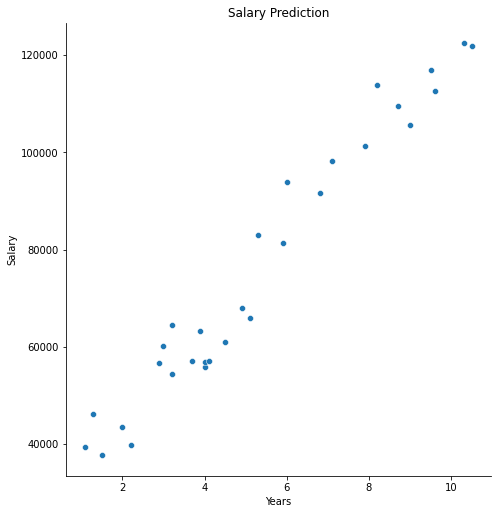

In [6]:
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],height=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
X = np.array(df.iloc[:, :-1]) #input feature
y = np.array(df.iloc[:, -1]) #output

# SPLITTING DATASET INTO TRAINING AND TESTING

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
#test_size=0.20 since, we are taking 20% of the data as test data
#you can give random_state=None to get different train and test sets each time we run this cell

In [11]:
X_train.shape[0]

24

In [12]:
y_train.shape

(24,)

# BUILDING OUR MODEL

**1.COMPUTING THE COST**

In [13]:
def compute_cost(x,y,w,b):
    n=x.shape[0]
    J=0#cost
    for i in range(n):
        f=w*x[i]+b
        J+=(f-y[i])**2
    J=J/(n)
    return J

**2.COMPUTING THE GRADIENT**

In [14]:
def compute_gradient(x,y,w,b):
    dw=0
    db=0
    n=x.shape[0]
    for i in range(n):
        f=w*x[i]+b
        d_dw=(f-y[i])*x[i]
        d_db=f-y[i]
        dw+=d_dw
        db+=d_db
    dw=dw/n
    db=db/n
    return db,dw

**3.GRADIENT DESCENT**

In [15]:
def gradient_descent(x,y,w,b,n_iter,alpha):
    J_history = []
    p_history = []
    
    for i in range(n_iter):
        dj_db,dj_dw = compute_gradient(x, y, w, b)
        w = w - (alpha * dj_dw)          
        b = b - (alpha * dj_db)               
        if i<100000:      # to prevent resource exhaustion 
            J_history.append(compute_cost(x, y, w, b))
            p_history.append([w,b])
    return w, b, J_history,p_history

# IMPLEMENTATION

In [16]:
w_ini=0
b_ini=0
n_iter=100000
alpha=0.0001
w_f,b_f,j,p=gradient_descent(X_train,y_train,w_ini,b_ini,n_iter,alpha)

In [17]:
#final w 
w_f

array([9830.41284435])

In [18]:
#final b
b_f

array([23498.3720422])

**COST VS ITERATION PLOT**

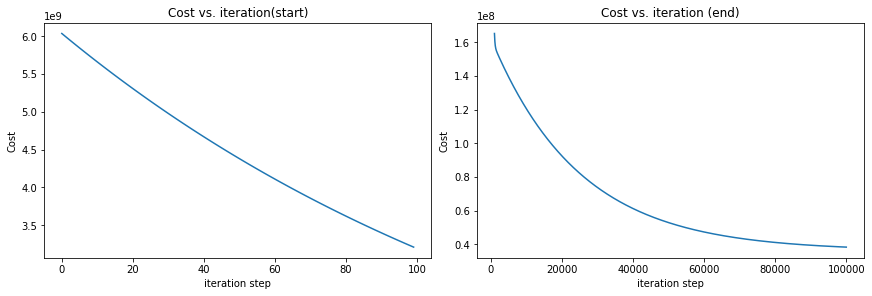

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j[:100])
ax2.plot(1000 + np.arange(len(j[1000:])), j[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

# PREDICTION

In [20]:
y_pred=w_f*X_test+b_f

# PREDICTED VS ACTUAL TEST VALUES

In [21]:
for i in range(len(y_pred)):
    print("Predicted = ",y_pred[i]," Actual = ",y_test[i])

Predicted =  [38243.99130872]  Actual =  37731.0
Predicted =  [124751.62433896]  Actual =  122391.0
Predicted =  [63803.06470402]  Actual =  57081.0
Predicted =  [61836.98213515]  Actual =  63218.0
Predicted =  [116887.29406348]  Actual =  116969.0
Predicted =  [109022.96378801]  Actual =  109431.0


# ACTUAL VS PREDICTION PLOT

Text(0, 0.5, 'SALARY')

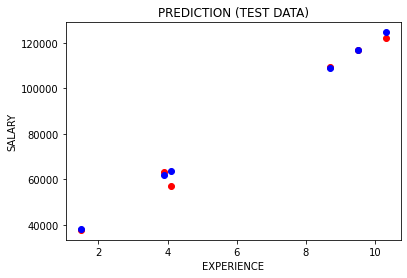

In [22]:
plt.scatter(X_test,y_test,color='red')# ACTUAL VALUE = RED
plt.scatter(X_test,y_pred,color='blue') #PREDICTED VALUE = BLUE
plt.title('PREDICTION (TEST DATA)')
plt.xlabel('EXPERIENCE')
plt.ylabel('SALARY')

# EQUATION OF OUR LINE

# f(x) = 9830.41x + 23498.38

# PLOT OF OUR DATASET AND OUR LINE

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

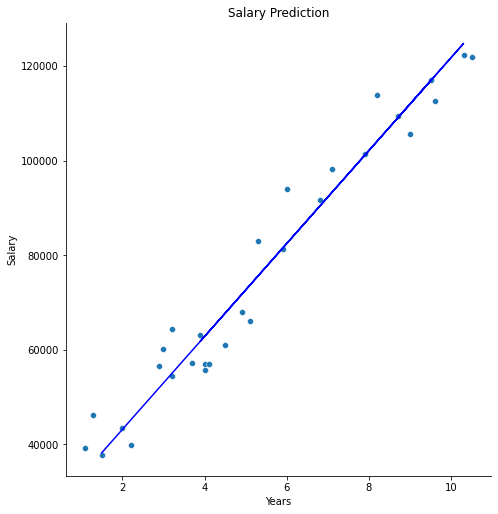

In [23]:
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

# COMPARISON OF PREDICTED & ACTUAL VALUES

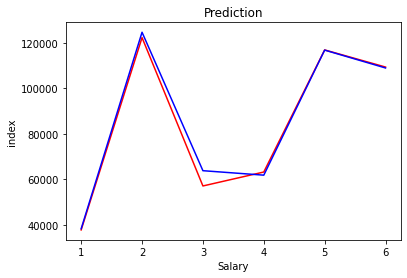

In [24]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-') #actual value = red
plt.plot(c,y_pred,color='b',linestyle='-') #predicted value=blue
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()